In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set(font_scale=2)

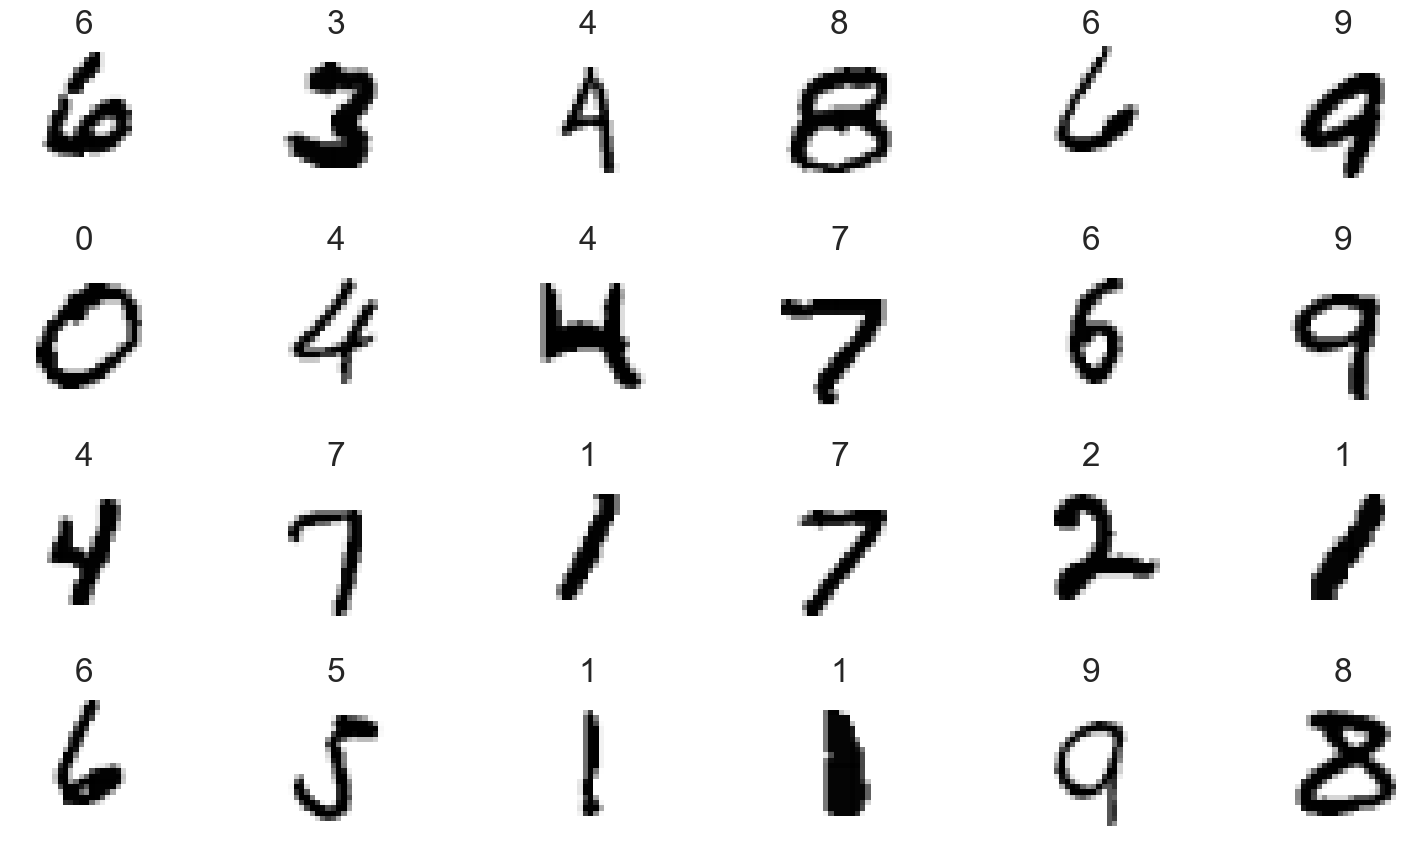

In [9]:
import numpy as np

index = np.random.choice(np.arange(len(X_train)), 24, replace = False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(target)
    plt.tight_layout()

In [10]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_train.shape

(60000, 28, 28, 1)

In [11]:
X_test = X_test.reshape((10000, 28, 28, 1))
X_test.shape

(10000, 28, 28, 1)

In [12]:
X_train = X_train.astype('float32') / 255 
X_test = X_test.astype('float32') / 255

In [13]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_train.shape

(60000, 10)

In [14]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [15]:
y_test = to_categorical(y_test)
y_test.shape

(10000, 10)

In [16]:
from tensorflow.keras.models import Sequential

In [18]:
cnn = Sequential()

In [19]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [20]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

In [21]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [22]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

In [23]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [24]:
cnn.add(Flatten())

In [25]:
cnn.add(Dense(units=128, activation='relu'))

In [26]:
cnn.add(Dense(units=10, activation='softmax'))

In [27]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 128)              

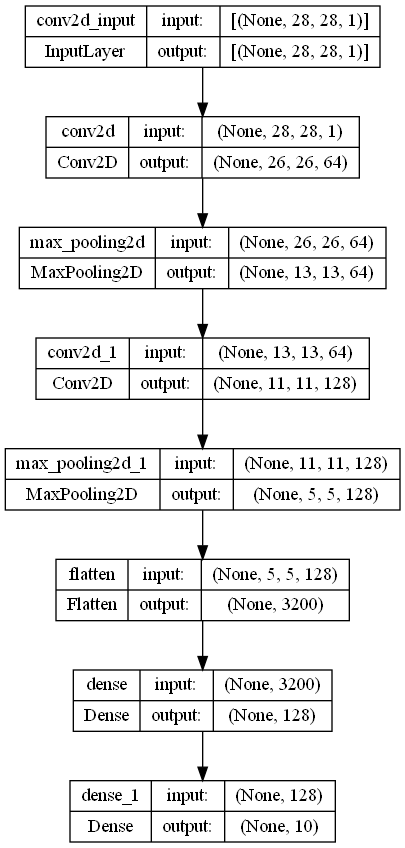

In [28]:
from tensorflow.keras.utils import plot_model 
from IPython.display import Image

plot_model(cnn, to_file='convnet.png', show_shapes=True, show_layer_names=True)
Image(filename='convnet.png')

In [29]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64,validation_split=0.1)

Epoch 1/5


844/844 [==============================] - 16s 18ms/step - loss: 0.1518 - accuracy: 0.9537 - val_loss: 0.0514 - val_accuracy: 0.9837
Epoch 2/5
844/844 [==============================] - 15s 18ms/step - loss: 0.0447 - accuracy: 0.9865 - val_loss: 0.0419 - val_accuracy: 0.9880
Epoch 3/5
844/844 [==============================] - 15s 18ms/step - loss: 0.0305 - accuracy: 0.9904 - val_loss: 0.0363 - val_accuracy: 0.9898
Epoch 4/5
844/844 [==============================] - 15s 18ms/step - loss: 0.0208 - accuracy: 0.9934 - val_loss: 0.0344 - val_accuracy: 0.9913
Epoch 5/5
844/844 [==============================] - 15s 18ms/step - loss: 0.0164 - accuracy: 0.9949 - val_loss: 0.0374 - val_accuracy: 0.9915


In [31]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0327 - accuracy: 0.9898


In [32]:
loss

0.03272836282849312

In [33]:
accuracy

0.989799976348877

In [34]:
przypuszczenia = cnn.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [35]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [36]:
for indeks, przypuszczenie in enumerate(przypuszczenia[0]):
    print(f'{indeks}: {przypuszczenie:.10%}')

0: 0.0000003431%
1: 0.0000000034%
2: 0.0000044857%
3: 0.0001025262%
4: 0.0000000000%
5: 0.0000001027%
6: 0.0000000000%
7: 99.9997377396%
8: 0.0000000396%
9: 0.0001590376%


In [37]:
obrazy = X_test.reshape((10000, 28, 28)) 
chybione_prognozy = []

for i, (p, e) in enumerate(zip(przypuszczenia, y_test)): 
    prognozowany, spodziewany = np.argmax(p), np.argmax(e)
    
    if prognozowany != spodziewany:
        chybione_prognozy.append((i, obrazy[i], prognozowany, spodziewany))

In [38]:
len(chybione_prognozy)

102

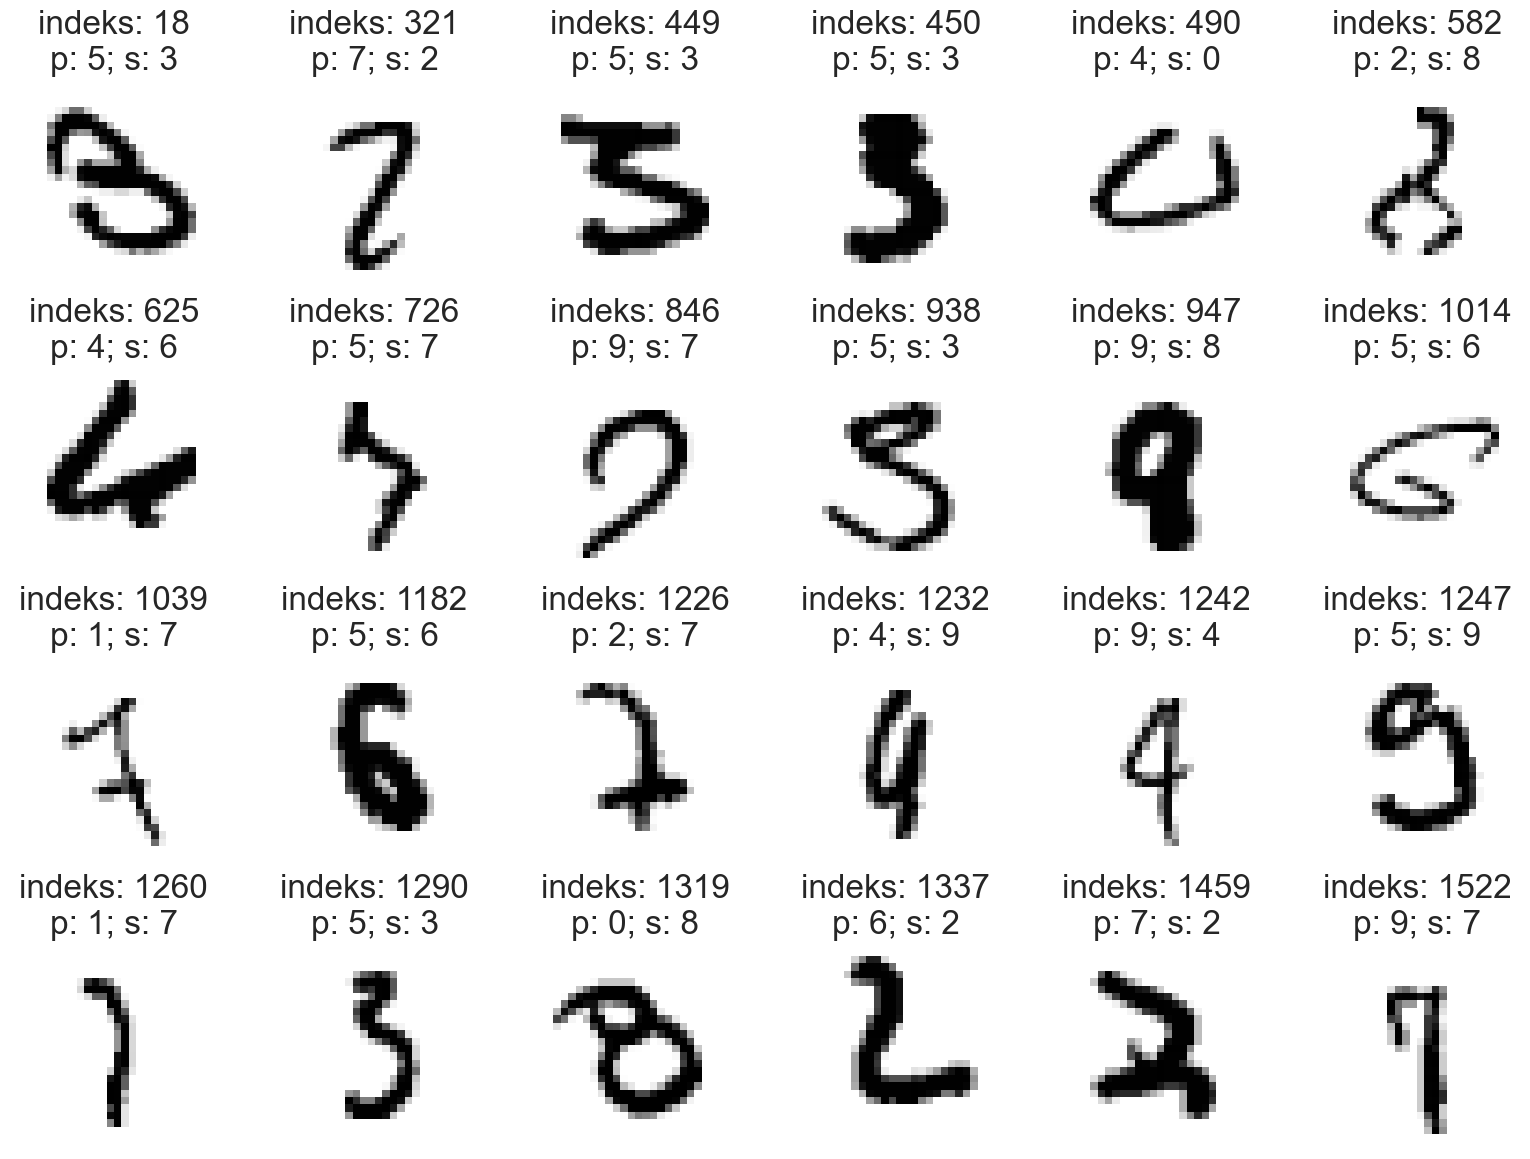

In [39]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, element in zip (axes.ravel(), chybione_prognozy):
    indeks, obraz, prognozowany, spodziewany = element
    axes.imshow(obraz, cmap=plt.cm.gray_r)
    axes.set_xticks([]) 
    axes.set_yticks([])
    axes.set_title(f'indeks: {indeks}\np: {prognozowany}; s: {spodziewany}')
    
plt.tight_layout()

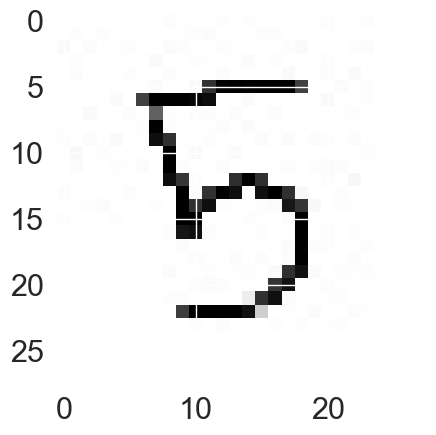

In [59]:
# ZAD 2
from PIL import Image

# Wczytanie cyfry z pliku
image_path = "cyfra.jpg"
handwritten_digit = Image.open(image_path).convert("L") # Konwersja do obrazu w skali szarości
handwritten_digit = handwritten_digit.resize((28, 28))  # Dopasowanie rozmiaru do oczekiwanego przez model
handwritten_digit = Image.eval(handwritten_digit, lambda x: 255 - x) # Zamiana czarnego na bialy i bialego na czarny

plt.imshow(handwritten_digit, cmap=plt.cm.gray_r)
plt.show()


In [62]:
# Przetworzenie obrazu do odpowiedniego formatu i normalizacja wartości pikseli
handwritten_digit_array = np.array(handwritten_digit).reshape(1, 28, 28, 1)
handwritten_digit_array = handwritten_digit_array.astype("float32") / 255

In [63]:
predictions = cnn.predict(handwritten_digit_array)

1/1 [==============================] - 0s 25ms/step


In [66]:
for indeks, przypuszczenie in enumerate(predictions[0]):
    print(f'{indeks}: {przypuszczenie:.10%}')

0: 0.0000000000%
1: 0.0000000146%
2: 0.0000000038%
3: 0.0008961206%
4: 0.0000000000%
5: 99.9991059303%
6: 0.0000000568%
7: 0.0000000042%
8: 0.0000016008%
9: 0.0000014222%


In [68]:
predicted_digit = np.argmax(predictions)
print("Pzypuszczana liczba:", predicted_digit)

Pzypuszczana liczba: 5
